# Image Classification Using ANN

Objective is to train the system to first understand what are handwritten images of digits an then test the system to predict new handwritten images correctly. We will feed our system with MNIST dataset and test it with random images to check the accuracy of its predictions.

It is a data-set, consisting images of handwritten digits from 0 to 9. Each image is a monochrome , 28 * 28 pixel.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [3]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X.shape

(70000, 784)

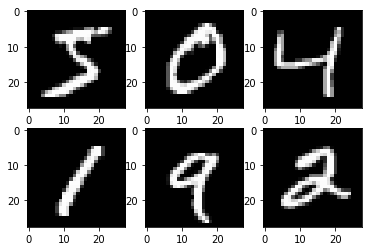

In [4]:
#Plot image from the pixel values
fig = plt.figure()

for i in range(6):
    ax = fig.add_subplot(2, 3, i+1) # this line adds sub-axes
    pixels = X[i].reshape((28, 28))
    ax.imshow(pixels, cmap='gray') # this line creates the image using the pre-defined sub axes

In [5]:
#See the first few rows of pixel values of images
X[0:5,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
#Target variable
y[0:6]

array(['5', '0', '4', '1', '9', '2'], dtype=object)

In [7]:
# Normalize the data
X = X / 255

MNIST consists of a gray scale image, 28x28 pixels in dimension. It means each pixel can take a value from 0 to 255.
Dividing each pixel value by 255 will result in inputs bounded between 0 and 1. 

In [10]:
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

### Building ANN Classifier model

In [11]:
#Import MLP Classifier
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

hidden_layer_sizes : The number of neurons in the hidden layer.

max_iter : Maximum number of iterations. 

alpha : L2 penalty (regularization term) parameter.

solver : The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

‘sgd’ refers to stochastic gradient descent.

‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

verbose : Whether to print progress messages to stdout.

tol : Tolerance for the optimization.

learning_rate_init : The initial learning rate used. It controls the step-size in updating the weights.

In [12]:
# Train the model using the training set
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05529723
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


C:\Users\Tejas.gowda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [13]:
#Prediction on train data
y_pred = mlp.predict(X_train)

#Accuracy
from sklearn import metrics
import numpy as np
print( "Training set score: ",np.round( metrics.accuracy_score(y_train, y_pred), 2 ) )

Training set score:  0.99


In [14]:
#Prediction on test data
y_pred_test = mlp.predict(X_test)

#Accuracy
print( 'Test set score: ',np.round( metrics.accuracy_score(y_test, y_pred_test), 2 ) )

Test set score:  0.97


In [12]:
y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [13]:
y_pred_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype='<U1')